<a href="https://colab.research.google.com/github/kshitij0209ag/Data-Scient-Project_11_FEB_2021/blob/main/Amazon_sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('/content/amazon_vfl_reviews.csv')

df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...


In [58]:
df.shape

(2782, 5)

In [59]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [60]:
df['review'].isnull().sum()

4

In [61]:
df['name'].sample(n=3)

333     Godrej-Security-Solutions-SEEC9060-Electronic
874                           Amul-Pure-Ghee-Pouch-1L
1146           Dettol-Disinfectant-Cleaner-Home-Fresh
Name: name, dtype: object

In [62]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

            asin                             name       date  rating review
2248  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2258  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2631  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN
2641  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN


In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [65]:
df['brandName'] = df['name'].str.split('-').str[0]
df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

# we have to change the another chart

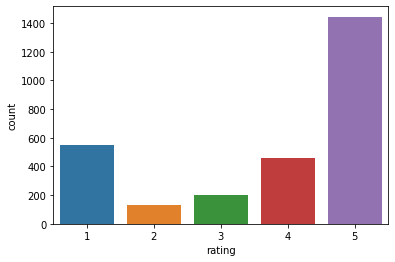

In [66]:
df.columns
sns.countplot(x='rating', data=df)

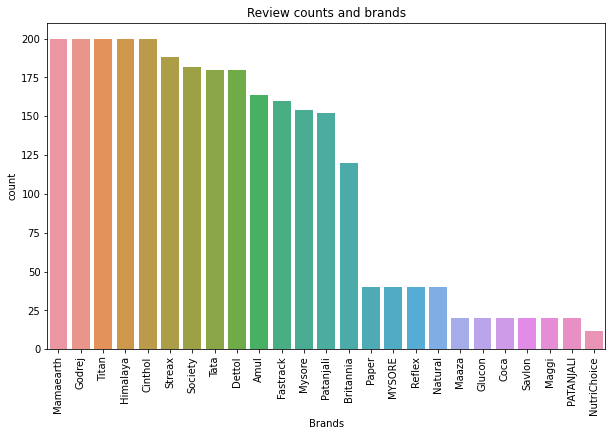

In [70]:
plt.figure(figsize = (10,6))
sns.barplot(df['brandName'].value_counts()
[:25].index,df['brandName'].value_counts()
[:25].values)
plt.title('Review counts and brands')
plt.xlabel('Brands')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [78]:
#converting to lower case
df['clean_review_text']=df['review'].str.lower()
#removing punctuations
df['clean_review_text']=df['clean_review_text'].str.translate(str.maketrans('','',str.punctuation))
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
  newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
return newtxt
df['clean_review_text'] = [removeStopWords(stopWords,x) 
for x in df['clean_review_text']]

AttributeError: ignored